In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
import matplotlib.patches as patches
import math
from typing import Dict, Tuple, List
import random

keys = {
    # Number row
    "`": {"pos": (0, 4), "start": "a"},
    "1": {"pos": (1, 4), "start": "a"},
    "2": {"pos": (2, 4), "start": "a"},
    "3": {"pos": (3, 4), "start": "s"},
    "4": {"pos": (4, 4), "start": "d"},
    "5": {"pos": (5, 4), "start": "f"},
    "6": {"pos": (6, 4), "start": "j"},
    "7": {"pos": (7, 4), "start": "j"},
    "8": {"pos": (8, 4), "start": "k"},
    "9": {"pos": (9, 4), "start": "l"},
    "0": {"pos": (10, 4), "start": ";"},
    "-": {"pos": (11, 4), "start": ";"},
    "=": {"pos": (12, 4), "start": ";"},
    # Top letter row
    "q": {"pos": (1.5, 3), "start": "a"},
    "w": {"pos": (2.5, 3), "start": "s"},
    "e": {"pos": (3.5, 3), "start": "d"},
    "r": {"pos": (4.5, 3), "start": "f"},
    "t": {"pos": (5.5, 3), "start": "f"},
    "y": {"pos": (6.5, 3), "start": "j"},
    "u": {"pos": (7.5, 3), "start": "j"},
    "i": {"pos": (8.5, 3), "start": "k"},
    "o": {"pos": (9.5, 3), "start": "l"},
    "p": {"pos": (10.5, 3), "start": ";"},
    "[": {"pos": (11.5, 3), "start": ";"},
    "]": {"pos": (12.5, 3), "start": ";"},
    "\\": {"pos": (13.5, 3), "start": ";"},
    # Home row
    "a": {"pos": (1.75, 2), "start": "a"},
    "s": {"pos": (2.75, 2), "start": "s"},
    "d": {"pos": (3.75, 2), "start": "d"},
    "f": {"pos": (4.75, 2), "start": "f"},
    "g": {"pos": (5.75, 2), "start": "f"},
    "h": {"pos": (6.75, 2), "start": "j"},
    "j": {"pos": (7.75, 2), "start": "j"},
    "k": {"pos": (8.75, 2), "start": "k"},
    "l": {"pos": (9.75, 2), "start": "l"},
    ";": {"pos": (10.75, 2), "start": ";"},
    "'": {"pos": (11.75, 2), "start": ";"},
    # Bottom letter row
    "z": {"pos": (2.25, 1), "start": "a"},
    "x": {"pos": (3.25, 1), "start": "s"},
    "c": {"pos": (4.25, 1), "start": "d"},
    "v": {"pos": (5.25, 1), "start": "f"},
    "b": {"pos": (6.25, 1), "start": "f"},
    "n": {"pos": (7.25, 1), "start": "j"},
    "m": {"pos": (8.25, 1), "start": "j"},
    ",": {"pos": (9.25, 1), "start": "k"},
    ".": {"pos": (10.25, 1), "start": "l"},
    "/": {"pos": (11.25, 1), "start": ";"},
    # Special keys
    "Shift_L": {"pos": (0, 1), "start": "a"},
    "Shift_R": {"pos": (12.5, 1), "start": ";"},
    "Ctrl_L": {"pos": (0, 0), "start": "a"},
    "Alt_L": {"pos": (2, 0), "start": "a"},
    "Space": {"pos": (5, 0), "start": "f"},
    "Alt_R": {"pos": (8, 0), "start": "j"},
    "Ctrl_R": {"pos": (10, 0), "start": ";"},
}

characters = {
    # Lowercase letters (unchanged)
    "a": ("a",),
    "b": ("b",),
    "c": ("c",),
    "d": ("d",),
    "e": ("e",),
    "f": ("f",),
    "g": ("g",),
    "h": ("h",),
    "i": ("i",),
    "j": ("j",),
    "k": ("k",),
    "l": ("l",),
    "m": ("m",),
    "n": ("n",),
    "o": ("o",),
    "p": ("p",),
    "q": ("q",),
    "r": ("r",),
    "s": ("s",),
    "t": ("t",),
    "u": ("u",),
    "v": ("v",),
    "w": ("w",),
    "x": ("x",),
    "y": ("y",),
    "z": ("z",),
    # Uppercase letters (updated)
    "A": ("Shift_R", "a"),
    "B": ("Shift_R", "b"),
    "C": ("Shift_R", "c"),
    "D": ("Shift_R", "d"),
    "E": ("Shift_R", "e"),
    "F": ("Shift_R", "f"),
    "G": ("Shift_R", "g"),
    "H": ("Shift_L", "h"),
    "I": ("Shift_L", "i"),
    "J": ("Shift_L", "j"),
    "K": ("Shift_L", "k"),
    "L": ("Shift_L", "l"),
    "M": ("Shift_L", "m"),
    "N": ("Shift_L", "n"),
    "O": ("Shift_L", "o"),
    "P": ("Shift_L", "p"),
    "Q": ("Shift_R", "q"),
    "R": ("Shift_R", "r"),
    "S": ("Shift_R", "s"),
    "T": ("Shift_R", "t"),
    "U": ("Shift_L", "u"),
    "V": ("Shift_R", "v"),
    "W": ("Shift_R", "w"),
    "X": ("Shift_R", "x"),
    "Y": ("Shift_L", "y"),
    "Z": ("Shift_R", "z"),
    # Numbers and their shifted symbols (updated)
    "1": ("1",),
    "!": ("Shift_R", "1"),
    "2": ("2",),
    "@": ("Shift_R", "2"),
    "3": ("3",),
    "#": ("Shift_R", "3"),
    "4": ("4",),
    "$": ("Shift_R", "4"),
    "5": ("5",),
    "%": ("Shift_R", "5"),
    "6": ("6",),
    "^": ("Shift_L", "6"),
    "7": ("7",),
    "&": ("Shift_L", "7"),
    "8": ("8",),
    "*": ("Shift_L", "8"),
    "9": ("9",),
    "(": ("Shift_L", "9"),
    "0": ("0",),
    ")": ("Shift_L", "0"),
    # Other symbols (updated)
    "`": ("`",),
    "~": ("Shift_R", "`"),
    "-": ("-",),
    "_": ("Shift_L", "-"),
    "=": ("=",),
    "+": ("Shift_L", "="),
    "[": ("[",),
    "{": ("Shift_L", "["),
    "]": ("]",),
    "}": ("Shift_L", "]"),
    "\\": ("\\",),
    "|": ("Shift_L", "\\"),
    ";": (";",),
    ":": ("Shift_L", ";"),
    "'": ("'",),
    '"': ("Shift_L", "'"),
    ",": (",",),
    "<": ("Shift_L", ","),
    ".": (".",),
    ">": ("Shift_L", "."),
    "/": ("/",),
    "?": ("Shift_L", "/"),
    # Space (unchanged)
    " ": ("Space",),
}


def map_home(keys: Dict[str, Tuple]) -> List[List[Tuple]]:
    """
    Create a mapping of key positions on the keyboard to their corresponding starting positions.

    This function generates a list of pairs where each pair consists of:
    - The ending position of a key (where the key is pressed).
    - The starting position of the finger (the position of the finger on the home row when typing that key).

    Parameters:
    - keys (dict): A dictionary containing the keyboard layout. Each key maps to a dictionary
                   that contains its position ('pos') and the character representing the starting position ('start').

    Returns:
    - List[List[Tuple[float, float]]]: A list of lists, where each inner list contains two tuples.
                                          Each tuple represents the (x, y) coordinates of the ending
                                          position of a key and the starting position of the finger.

    """
    mapping = []  # Initialize an empty list to store the mappings.
    for key in keys:  # Iterate over each key in the provided keys dictionary.
        end_pos = keys[key]["pos"]  # Get the position of the key being pressed.
        start_char = keys[key][
            "start"
        ]  # Get the character that corresponds to the starting position.
        start_pos = keys[start_char][
            "pos"
        ]  # Get the position of the starting character.
        mapping.append(
            [end_pos, start_pos]
        )  # Append the end position and start position as a pair.
    return mapping  # Return the complete list of mappings.


def get_keys_pressed(string: str, characters: Dict[str, Tuple]):
    """
    Identify the set of keys that are pressed while typing a given string.

    This function examines the characters in the input string and retrieves all unique keys
    needed to type those characters based on a provided mapping.

    Parameters:
    - string (str): The input string for which key presses are to be identified.
    - characters (dict): A dictionary mapping characters to the keys needed to type them.
                         Each character maps to a tuple of keys.

    Returns:
    - List[str]: A list of unique keys that are pressed while typing the string.

    """
    keys_pressed = set()  # Use a set to avoid duplicate keys.
    for cha in string:  # Iterate over each character in the input string.
        for c in characters[
            cha
        ]:  # For each character, get the corresponding keys needed.
            keys_pressed.add(c)  # Add each key to the set of pressed keys.
    return list(keys_pressed)  # Convert the set back to a list and return it.

In [57]:
# Simulated annealing algorithm
import copy


# Simulated Annealing algorithm to optimize keyboard layout for typing efficiency
def simulated_annealing(
    keys: Dict[str, Tuple] , characters: Dict[str, Tuple], string: str, initial_temp: int, cooling_rate: float, num_iterations: int, mapping: List[List[Tuple]]
) -> List:
    """
    Perform simulated annealing to find the best key layout minimizing typing distance.

    Parameters:
    - keys (dict): Current mapping of characters to their respective key positions.
    - characters (dict): Mapping from characters to the key(s) needed to type them.
    - string (str): The input string for which to optimize the typing distance.
    - initial_temp (float): The initial temperature for the annealing process.
    - cooling_rate (float): The rate at which the temperature decreases.
    - num_iterations (int): The number of iterations to perform.
    - mapping (list): A list mapping end positions to starting positions.

    Returns:
    - best_keys (list): The best key configurations found during the process.
    - best_distances (list): The corresponding distances for the best configurations.
    - distances (list): The distances encountered at each iteration.
    """
    current_keys = keys.copy()  # Start with a copy of the initial keys
    current_distance = calc_distance(
        characters, keys, string, mapping
    )  # Calculate initial typing distance

    best_key = copy.deepcopy(current_keys)  # Store the best key configuration found
    best_distance = current_distance  # Store the best distance found

    temp = initial_temp  # Set initial temperature for annealing
    distances = [current_distance]  # Track distances over iterations
    best_keys = [copy.deepcopy(best_key)]  # Track best key configurations
    best_distances = [best_distance]  # Track best distances

    # Perform the simulated annealing iterations
    for i in range(num_iterations):
        neighbour_keys = get_neighbour(
            current_keys, get_keys_pressed(string, characters)
        )  # Get a neighboring key configuration
        neighbour_distance = calc_distance(
            characters, neighbour_keys, string, mapping
        )  # Calculate distance for the neighbor

        # Calculate acceptance probability
        p = np.exp((current_distance - neighbour_distance) / temp)

        # Accept the neighbor solution based on distance or probability
        if neighbour_distance < current_distance or random.random() < p:
            current_keys = neighbour_keys  # Update current keys to neighbor
            current_distance = neighbour_distance  # Update current distance

            # Update best found configuration if the new distance is better
            if current_distance < best_distance:
                best_key = copy.deepcopy(current_keys)  # Update best key configuration
                best_distance = current_distance  # Update best distance
                best_keys.append(
                    copy.deepcopy(best_key)
                )  # Keep track of best configurations
                best_distances.append(best_distance)  # Keep track of best distances

        temp *= cooling_rate  # Cool down the temperature
        distances.append(current_distance)  # Track current distance

    return best_keys, best_distances, distances  # Return the results


# Generate a neighboring solution by swapping the positions of two keys
def get_neighbour(keys: Dict[str, Tuple], keys_pressed: List) -> Dict[str, Tuple]:
    """
    Generate a neighboring key configuration by swapping two keys.

    Parameters:
    - keys (dict): Current mapping of character keys to positions.
    - keys_pressed (list): The keys that were pressed in the input string.

    Returns:
    - new_keys (dict): A modified copy of the original keys with two keys swapped.
    """
    new_keys = copy.deepcopy(keys)  # Create a copy of the current keys
    i = np.random.randint(1, len(keys_pressed) - 1)  # Randomly select one key to swap
    j = np.random.randint(1, len(keys) - 1)  # Randomly select another key to swap
    # Swap the positions of the selected keys
    new_keys[keys_pressed[i]]["pos"], new_keys[list(keys.keys())[j]]["pos"] = (
        new_keys[list(keys.keys())[j]]["pos"],
        new_keys[keys_pressed[i]]["pos"],
    )
    return new_keys  # Return the new key configuration

Finger distance for the optimum keyboard is 5.47213595499958


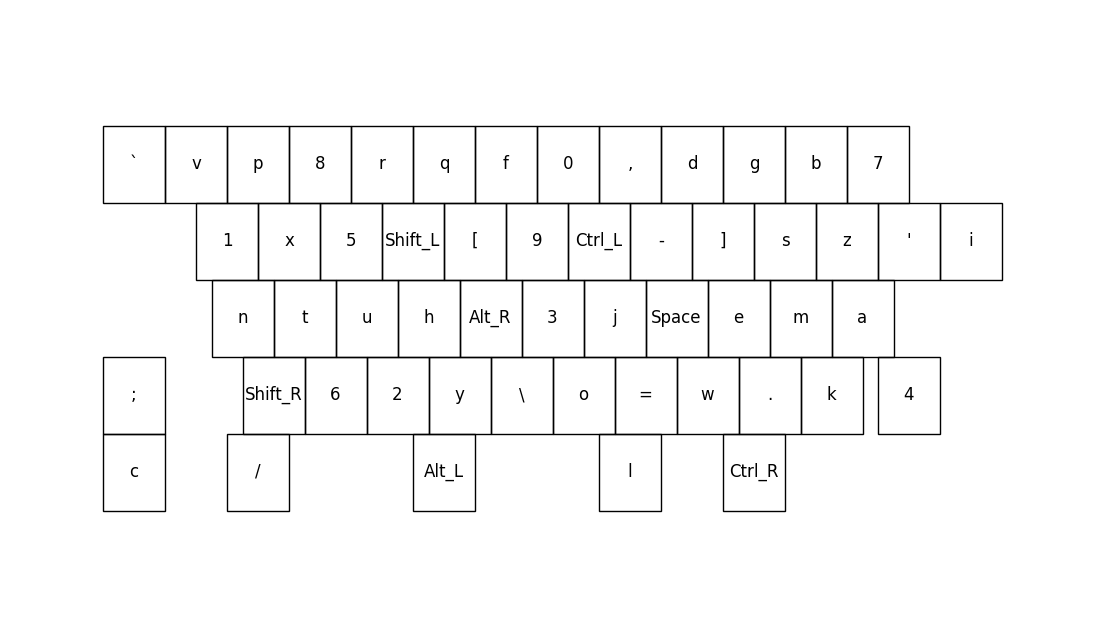

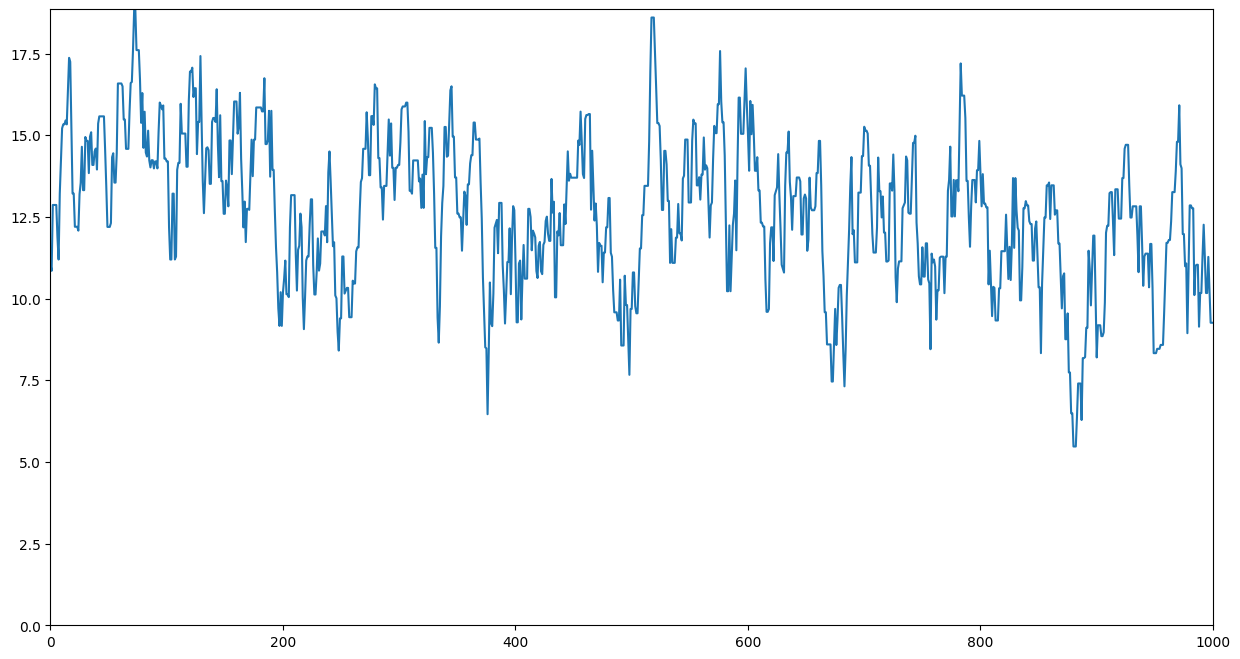

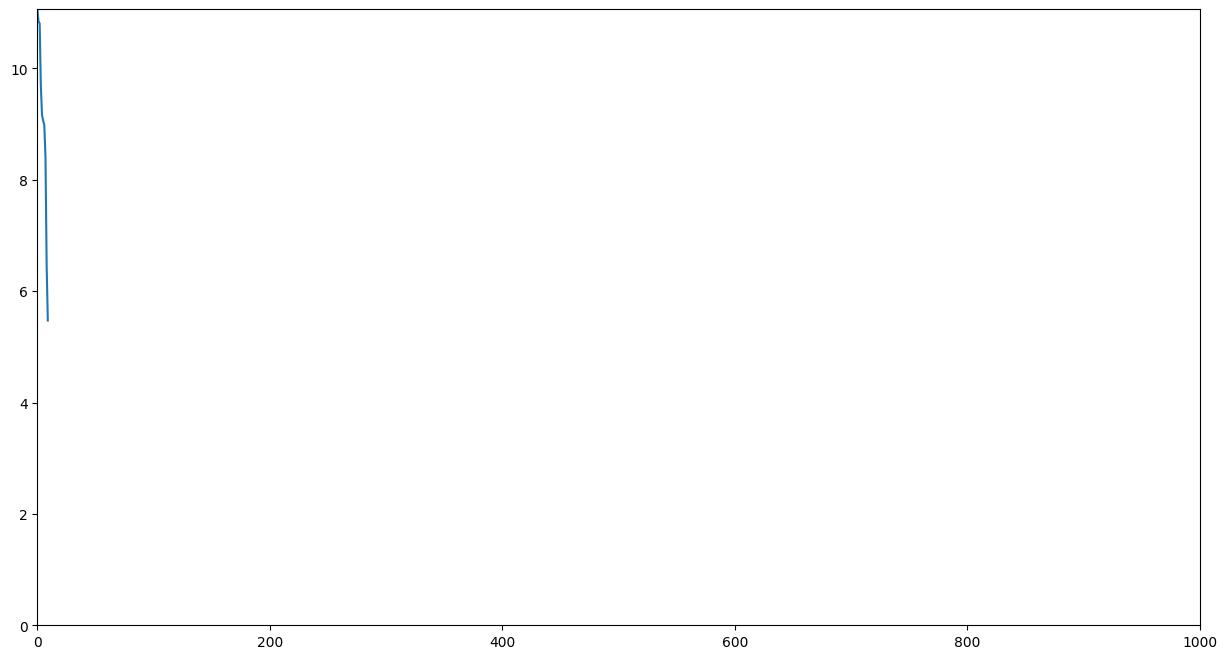

In [58]:
def calc_distance(
    characters: Dict[str, Tuple], keys: Dict[str, Tuple], string: str, mapping: List[List[Tuple]]
) -> float:
    """
    Calculate the total movement distance required to type a given string.

    Parameters:
    - characters (dict): Mapping from characters to the key(s) needed to type them.
    - keys (dict): Information about the position and starting key of each physical key.
    - string (str): The string to calculate typing distance for.
    - mapping (list of list of tuples) : To mark the starting and ending coordinates
    Returns:
    - float: Total distance traveled to type the string.
    """
    dis = 0
    for c in string:
        # Retrieve the keys needed to type the character
        keys_needed = characters[c]
        for key in keys_needed:
            # Get the position of the current key and the starting position based on the key's starting point
            end_pos = keys[key]["pos"]
            # start_char = keys[key]['start']
            for pair in mapping:
                if end_pos == pair[0]:
                    start_pos = pair[1]
            # Accumulate the distance moved between starting and ending key positions
            dis += calculate_distance(start_pos, end_pos)
    return dis


def calculate_distance(pos1: Tuple, pos2: Tuple) -> float:
    """
    Calculate the Euclidean distance between two points.

    Parameters:
    - pos1 (tuple): (x, y) coordinates of the first position.
    - pos2 (tuple): (x, y) coordinates of the second position.

    Returns:
    - float: Euclidean distance between pos1 and pos2.
    """
    dis = math.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)
    return dis


def create_keyboard(
    s: str, characters: Dict[str, Tuple], keys: Dict[str, Tuple], scale_factor=10
):
    """
    Create and display a heatmap of the keyboard, showing the frequency of each key press.

    Parameters:
    - s (str): The input string to analyze for key presses.
    - characters (dict): Mapping from characters to the key(s) needed to type them.
    - keys (dict): Information about the position and starting key of each physical key.
    - scale_factor (int, optional): Scale factor for enlarging the heatmap grid. Default is 10.

    The function generates a keyboard gives the minumum finger distance. It also plots the the graph betweeen number of iterations and the current distance.
    """
    mapping = map_home(keys)
    string = s
    initial_temp = 1000
    cooling_rate = 0.995
    num_iterations = 1000
    best_keys, best_distances, cur_dist = simulated_annealing(
        keys, characters, string, initial_temp, cooling_rate, num_iterations, mapping
    )
    fig, ax = plt.subplots(figsize=(14, 8))
    best_dis = min(best_distances)

    ind = best_distances.index(best_dis)
    out_keys = best_keys[ind]

    # Extract x and y coordinates for all the keys on the keyboard
    x_coords = [pos["pos"][0] for pos in keys.values()]
    y_coords = [pos["pos"][1] for pos in keys.values()]

    # Determine the min and max coordinates for heatmap scaling
    min_x, max_x = min(x_coords), max(x_coords)
    min_y, max_y = min(y_coords), max(y_coords)

    # Scale the positions to a larger integer grid
    x_scaled = [int((x - min_x) * scale_factor) for x in x_coords]
    y_scaled = [int((y - min_y) * scale_factor) for y in y_coords]

    # Add rectangles and labels for each key on the keyboard
    for key, pos in out_keys.items():
        x, y = out_keys[key]["pos"]
        # Create a rectangle around each key
        rect = patches.Rectangle(
            (x - 0.5, y - 0.5), 1, 1, linewidth=1, edgecolor="black", facecolor="none"
        )
        ax.add_patch(rect)

        # Label each key with its corresponding character
        ax.text(x, y, key, ha="center", va="center", color="black", fontsize=12)

    # Set plot limits and title, and hide axes
    print("Finger distance for the optimum keyboard is", min(best_distances))
    ax.set_xlim(min_x - 2, max_x + 2)
    ax.set_ylim(min_y - 2, max_y + 2)
    ax.axis("off")
    plt.savefig("keyboard")
    # Show the keyboard
    plt.show()
    fig, ax = plt.subplots(figsize=(15, 8))
    # Plotting the graph for each distance obtained in each iteration
    ax.set_xlim(0, num_iterations)
    ax.set_ylim(0, max(cur_dist))
    plt.plot(range(0, num_iterations + 1), cur_dist)
    plt.savefig("Each distance")
    plt.show()
    # Plotting the graph for the best_distances obtained for each iteration
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_xlim(0, num_iterations)
    ax.set_ylim(0, max(best_distances))
    plt.plot(range(0, len(best_distances)), best_distances)
    plt.savefig("Best distances")
    plt.show()


# Example usage with a sample string
create_keyboard("Thank you", characters, keys, scale_factor=50)